In [1]:
import numpy as np
import pandas as pd
import imageio
import h5py
import pickle

from tqdm import tqdm
from xqdm import xqdm
from pathlib import Path
import matplotlib.pyplot as plt
import re

In [2]:
dataset_dir = Path('data')
csv_files = dataset_dir.glob('*.csv')

In [3]:
using_columns = ['timestamp',
                 'acceleration_x', 'acceleration_y', 'acceleration_z',
                 'angular_vec_x', 'angular_vec_y', 'angular_vec_z',
                 'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
                 'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']

In [4]:
def interpolation(x, xt, y, yt, t):
    if xt == t:
        return x
    if yt == t:
        return y
    return x + (t - xt) / (yt - xt) * (y - x)

In [6]:
def clean_csv(csv) -> pd.DataFrame:
    rows = {col: [float(csv[col][0])] for col in using_columns}

    dt = 11760000
    nt = rows['timestamp'][0] + dt
    ni = 1

    while True:
        if ni >= len(csv) - 2:
            break

        for i in range(ni, len(csv)):
            if csv['timestamp'][i] > nt:
                for col in using_columns:
                    rows[col].append(interpolation(csv[col][i-1], csv['timestamp'][i-1], csv[col][i], csv['timestamp'][i], nt))
                break

        nt += dt
        ni = i - 1
    
    return pd.DataFrame(rows)

In [10]:
def __f(args):
    user = args[0]
    scene = args[1]
    
    csv_file = dataset_dir / f'motion_data_user{user}_scene{scene}.csv'
    out_file = dataset_dir / f'interpolation_user{user}_scene{scene}.csv'

    csv = pd.read_csv(csv_file)
    csv = csv[using_columns]
    csv = clean_csv(csv)

    csv.to_csv(out_file)
    return csv

In [11]:
items = []
for user in range(1, 8):
    for scene in range(1, 4):
        items.append((user, scene))

In [12]:
csv_list = xqdm(__f, items)

  0%|          | 0/21 [00:00<?, ?it/s]

data/motion_data_user1_scene1.csvdata/motion_data_user1_scene2.csv data/motion_data_user2_scene2.csvdata/motion_data_user1_scene3.csvdata/motion_data_user3_scene1.csv data/motion_data_user2_scene1.csv->data/motion_data_user4_scene3.csvdata/motion_data_user4_scene2.csvdata/motion_data_user2_scene3.csvdata/motion_data_user5_scene1.csvdata/motion_data_user5_scene2.csvdata/motion_data_user5_scene3.csvdata/motion_data_user6_scene1.csvdata/motion_data_user4_scene1.csv data/motion_data_user3_scene3.csv data/motion_data_user3_scene2.csv->         ->  ->-> ->->->->->-> ->data/interpolation_user1_scene2.csv  ->     data/interpolation_user2_scene2.csv 
data/interpolation_user3_scene1.csvdata/interpolation_user2_scene3.csv data/interpolation_user4_scene3.csvdata/interpolation_user5_scene2.csvdata/interpolation_user4_scene2.csvdata/interpolation_user6_scene1.csv data/interpolation_user5_scene1.csvdata/interpolation_user1_scene1.csv


data/interpolation_user3_scene2.csv

-> 
->
data/interpolation_us

  5%|▍         | 1/21 [00:17<05:54, 17.72s/it]

data/motion_data_user6_scene2.csv -> data/interpolation_user6_scene2.csv


 10%|▉         | 2/21 [00:18<04:01, 12.71s/it]

data/motion_data_user6_scene3.csv -> data/interpolation_user6_scene3.csv


 14%|█▍        | 3/21 [00:19<02:44,  9.15s/it]

data/motion_data_user7_scene1.csv -> data/interpolation_user7_scene1.csv


 19%|█▉        | 4/21 [00:21<01:58,  6.98s/it]

data/motion_data_user7_scene2.csv ->data/motion_data_user7_scene3.csv -> data/interpolation_user7_scene3.csv 
data/interpolation_user7_scene2.csv


100%|██████████| 21/21 [01:37<00:00,  4.62s/it]


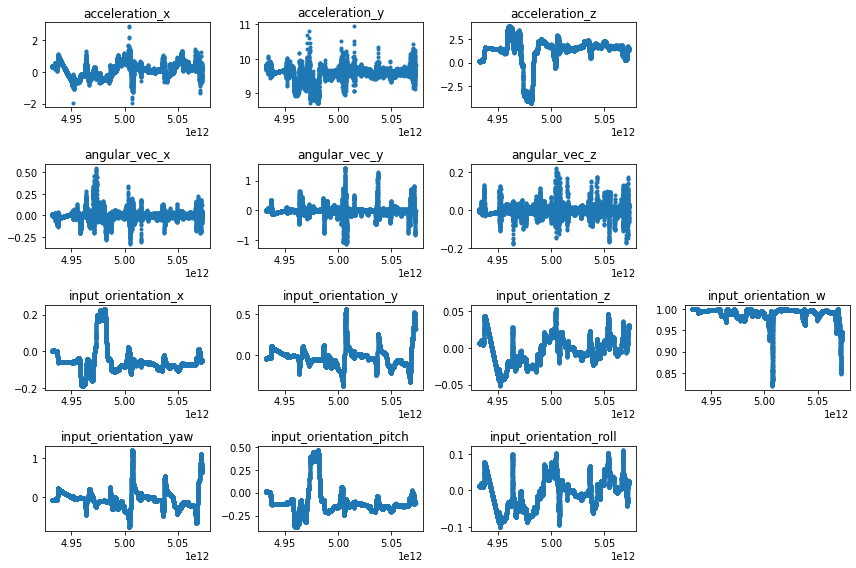

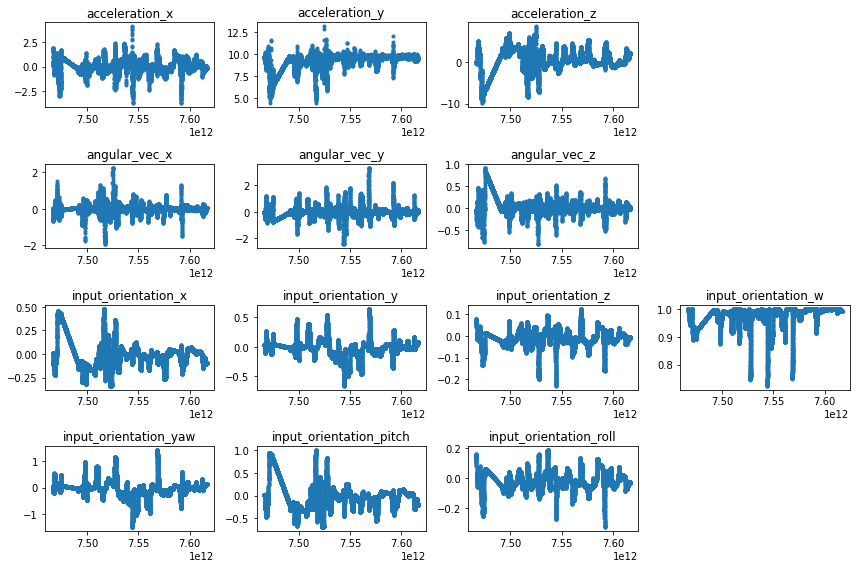

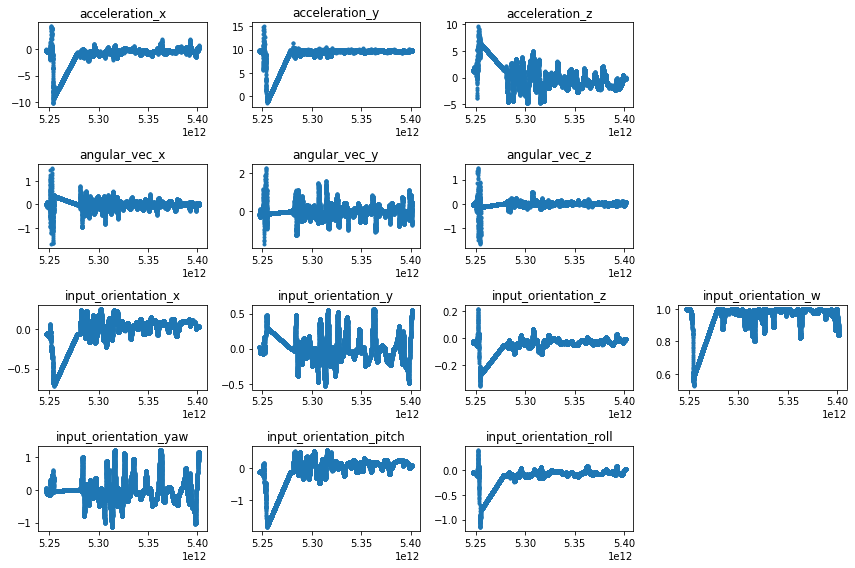

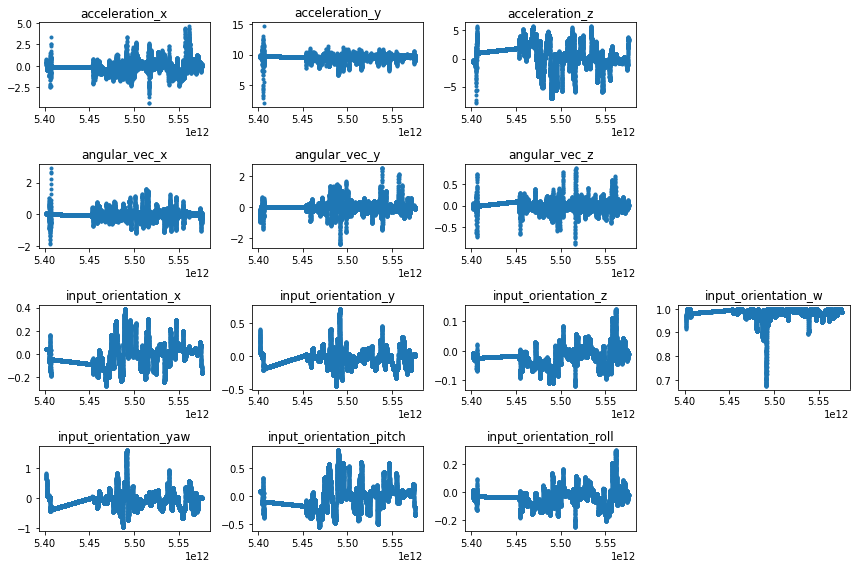

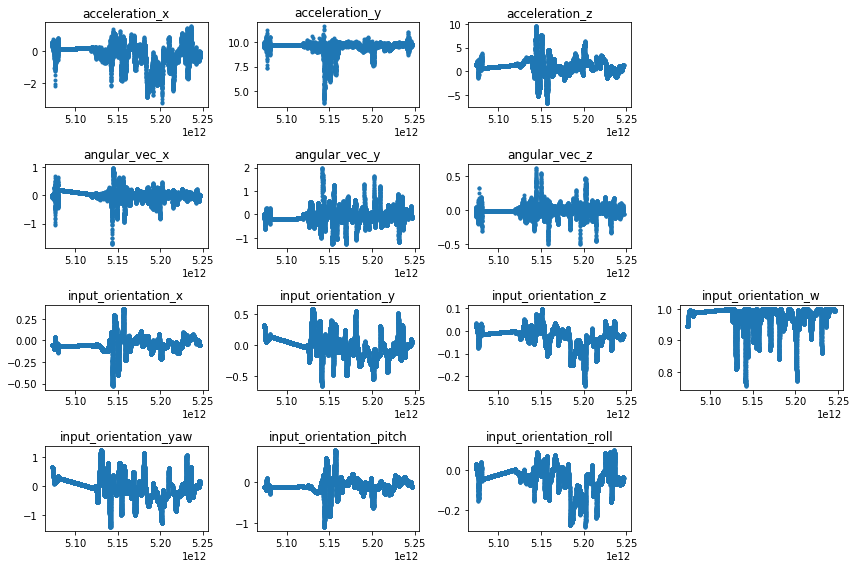

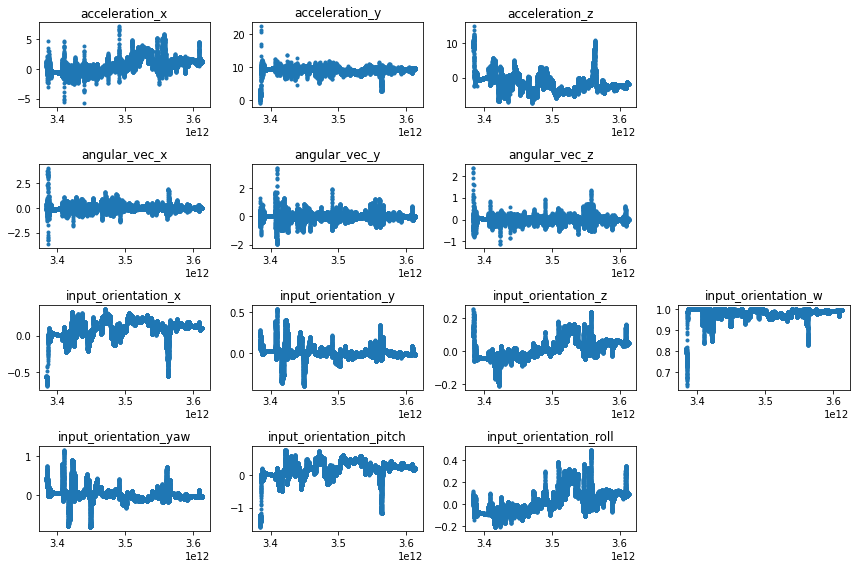

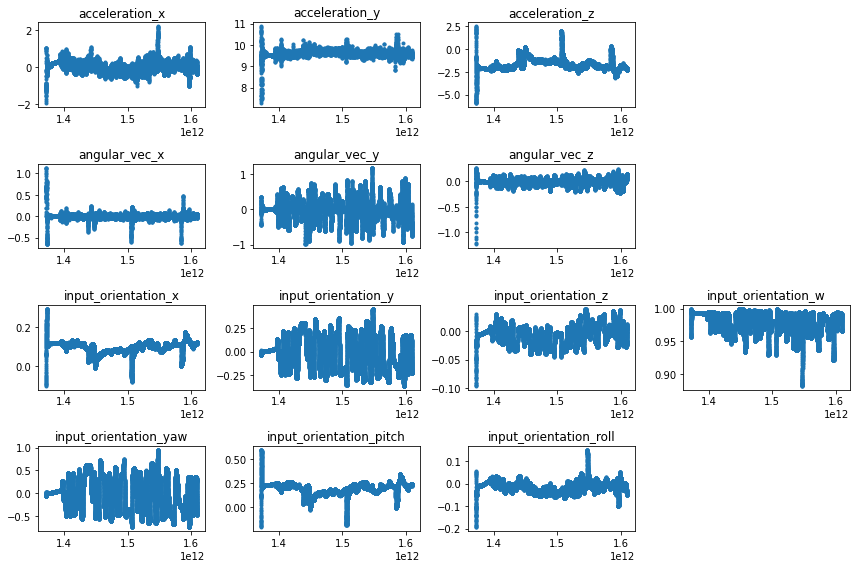

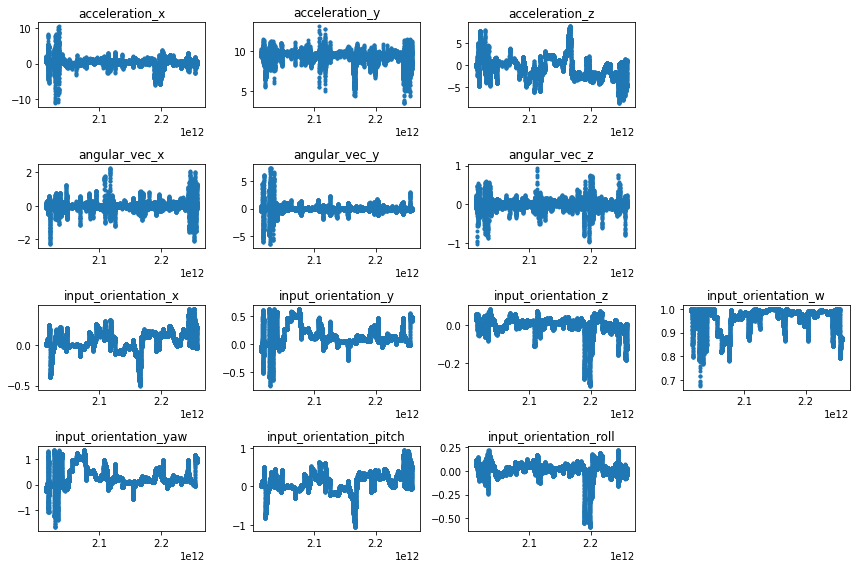

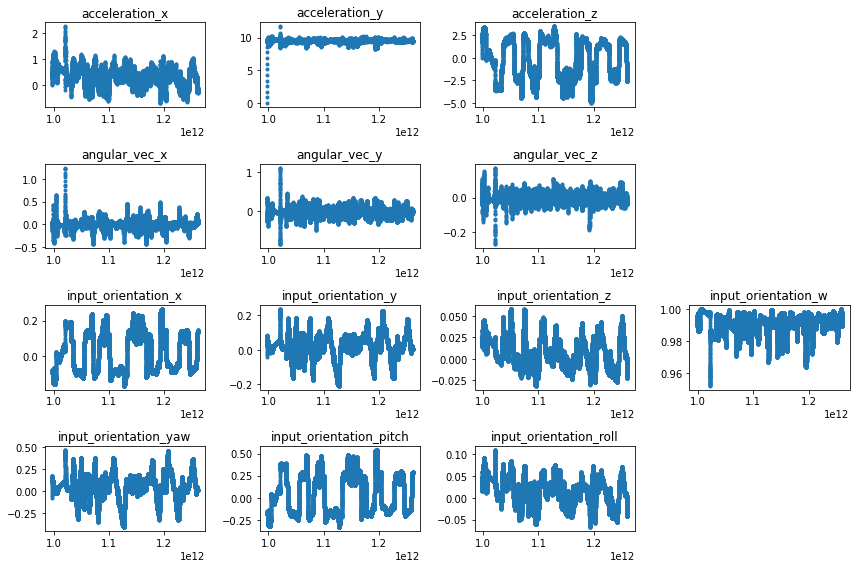

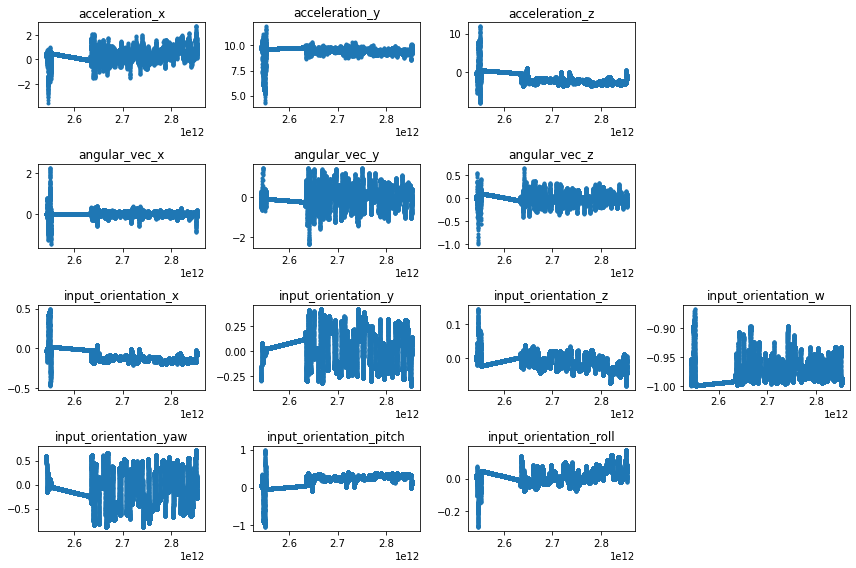

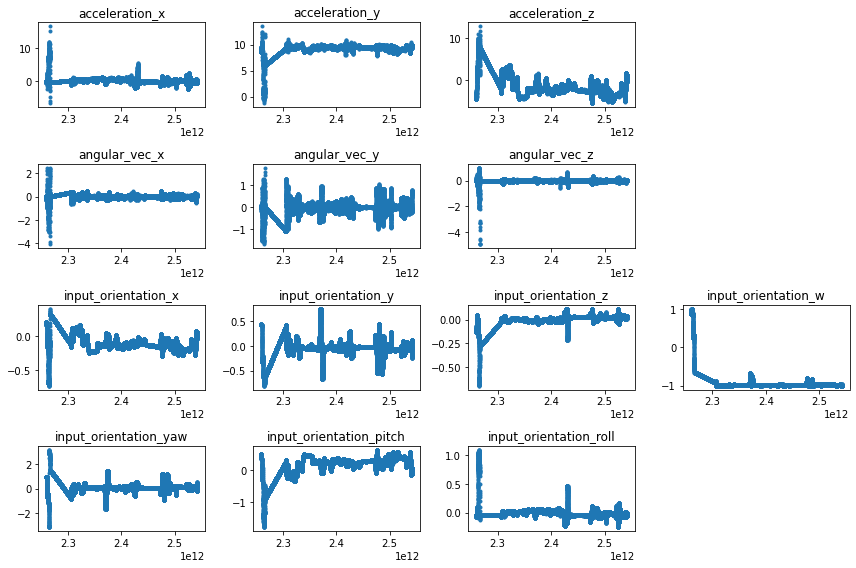

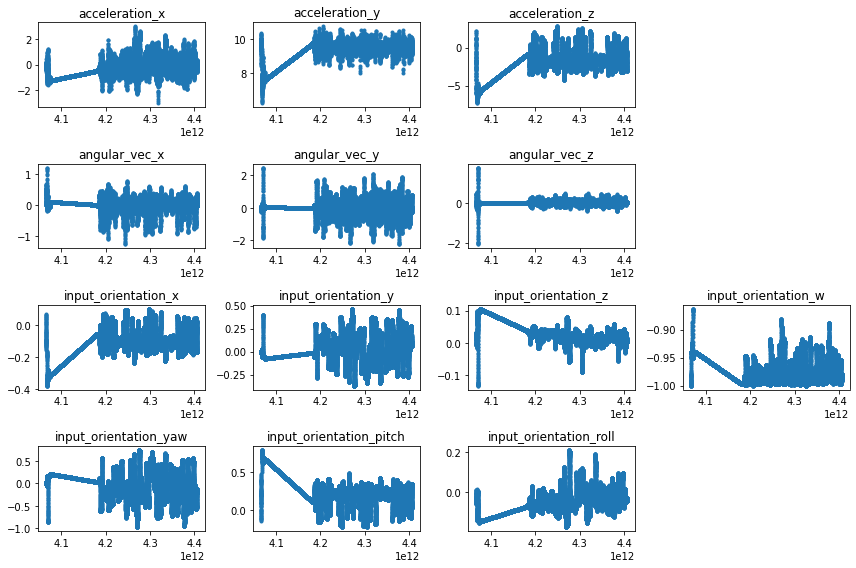

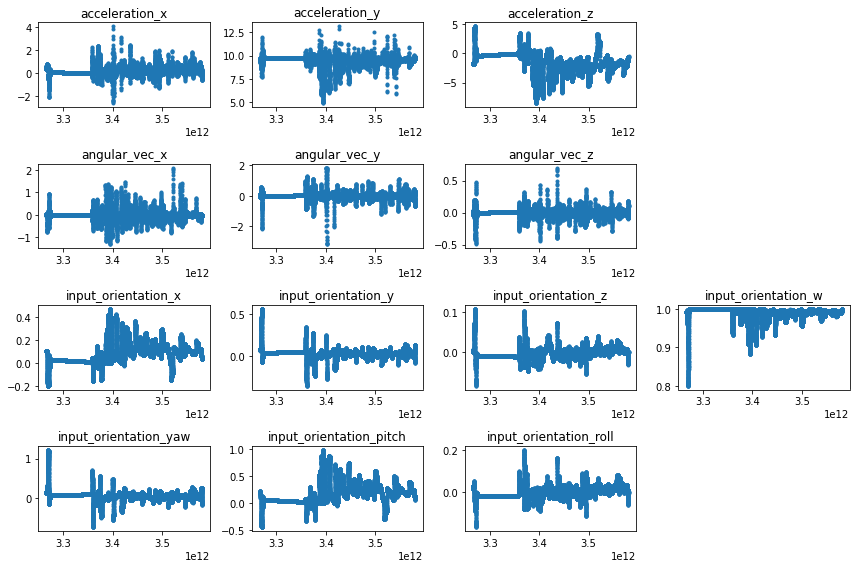

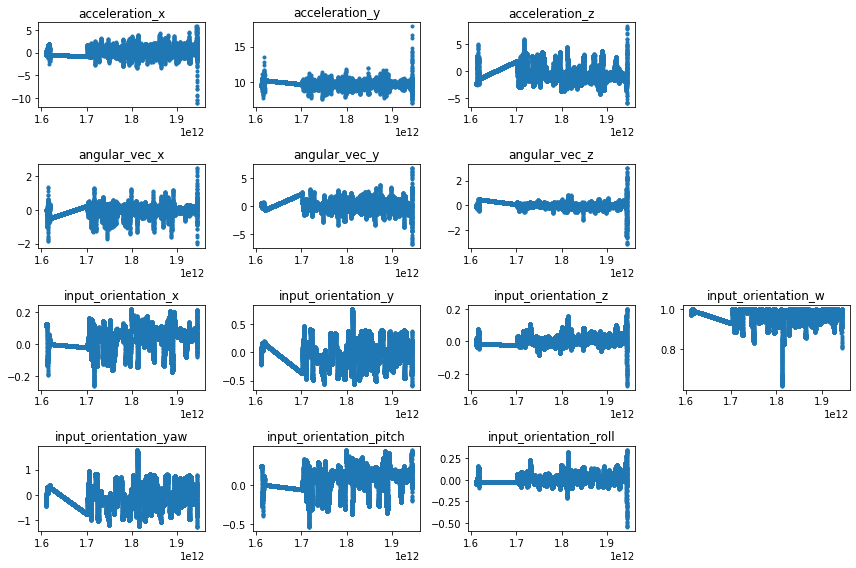

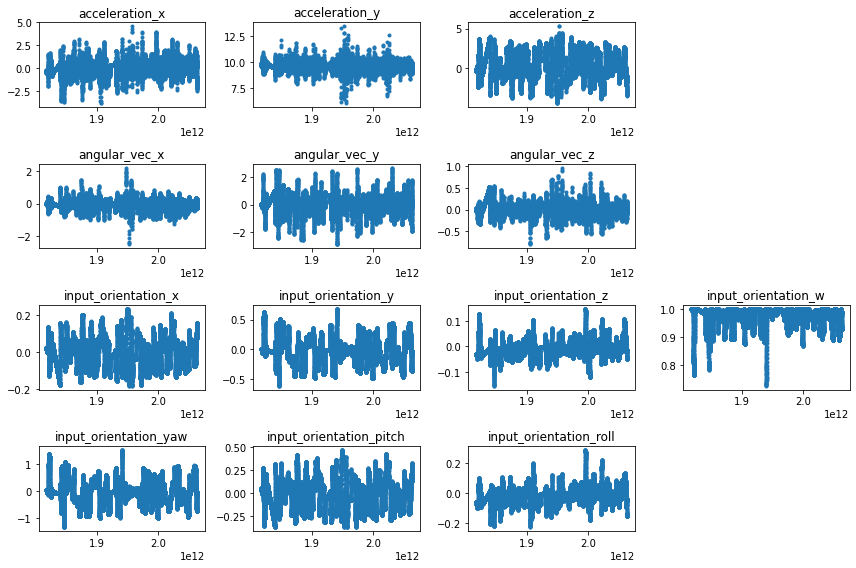

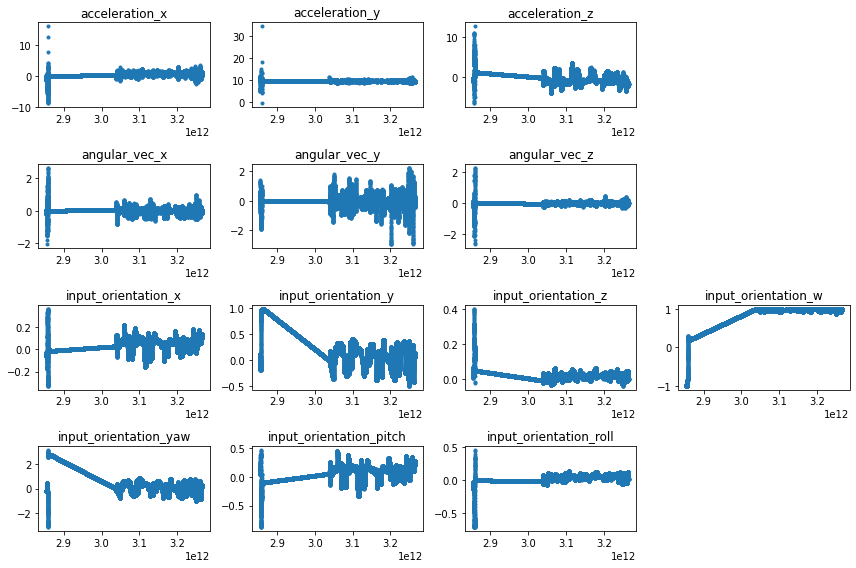

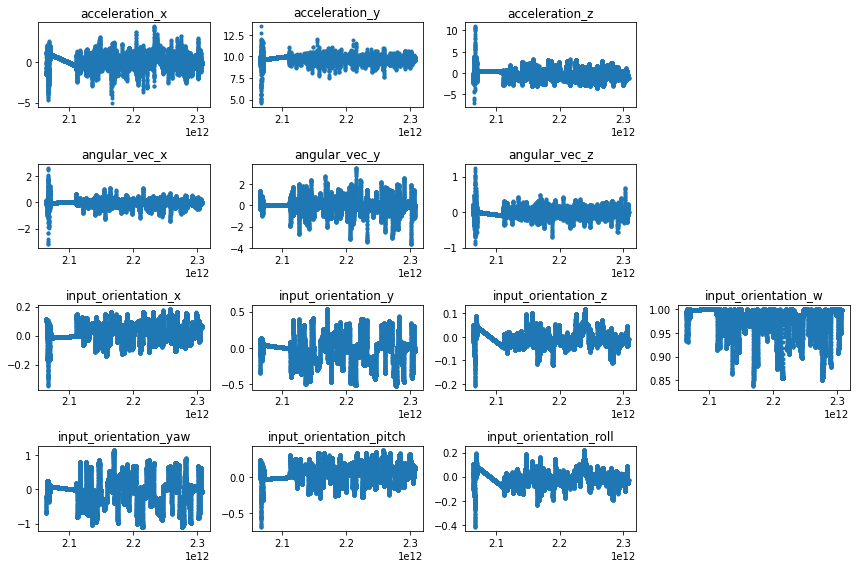

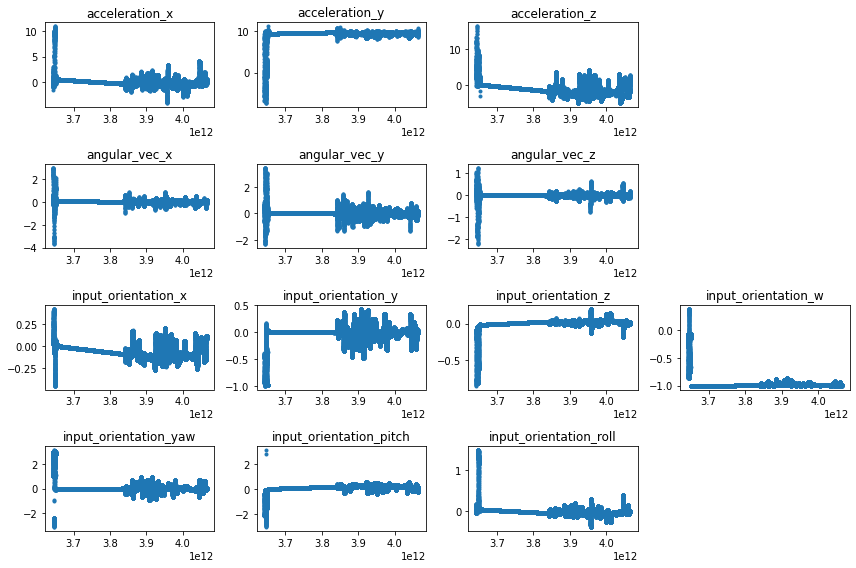

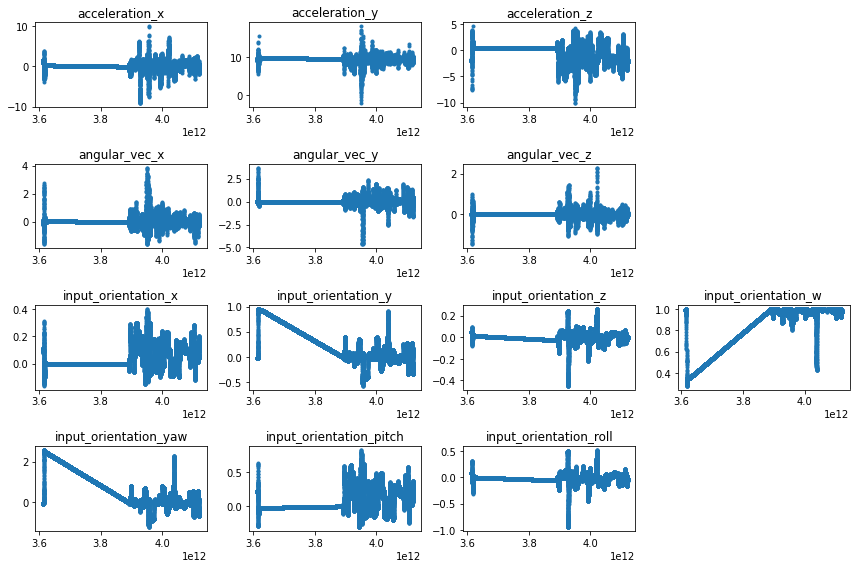

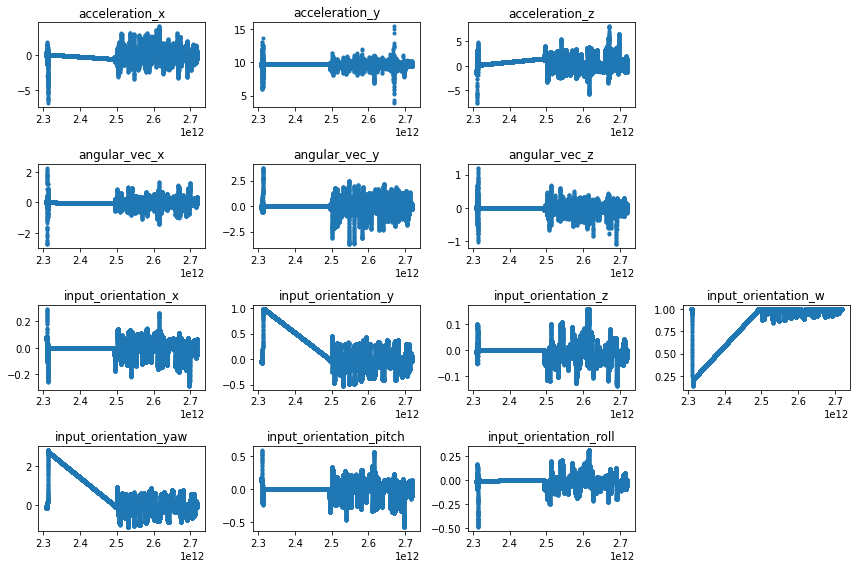

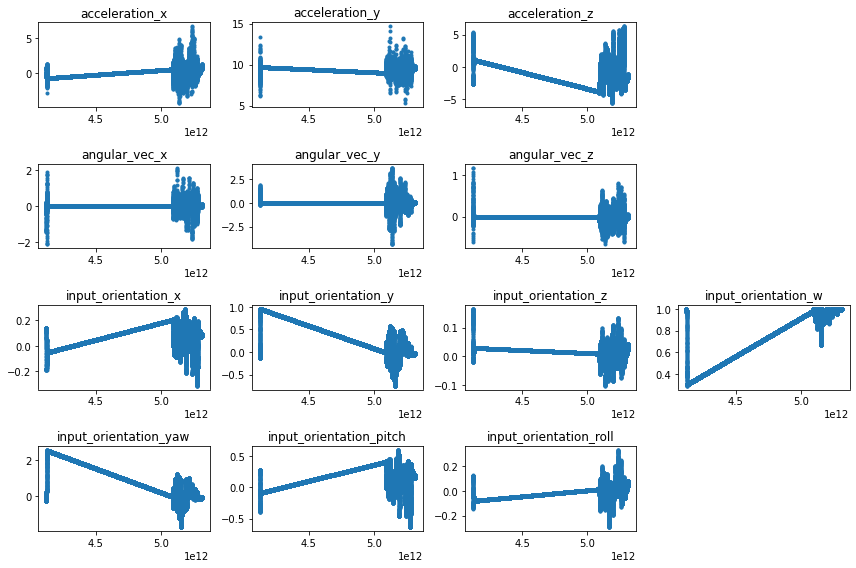

In [18]:
for csv in csv_list:
    plt.figure(figsize=(12, 8))

    for i in range(3):
        plt.subplot(4, 4, i+1)
        plt.scatter(csv['timestamp'], csv[using_columns[i+1]], marker='.')
        plt.title(using_columns[i+1])
    for i in range(3):
        plt.subplot(4, 4, i+5)
        plt.scatter(csv['timestamp'], csv[using_columns[i+4]], marker='.')
        plt.title(using_columns[i+4])
    for i in range(4):
        plt.subplot(4, 4, i+9)
        plt.scatter(csv['timestamp'], csv[using_columns[i+7]], marker='.')
        plt.title(using_columns[i+7])
    for i in range(3):
        plt.subplot(4, 4, i+13)
        plt.scatter(csv['timestamp'], csv[using_columns[i+11]], marker='.')
        plt.title(using_columns[i+11])

    plt.tight_layout()
    plt.show()
    
    print('\n\n')